# Анализ данных в Python (pandas и numpy). Зимние тренды

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# A. Загрузка и первичный обзор

In [51]:
df = pd.read_csv('Winter_Fashion_Trends_Dataset.csv', encoding='latin1')
print ('Первые 5 строк:')
print (df.head(5))
print ('Последние 5 строк:')
print ( df.tail(5))


Первые 5 строк:
   ID       Brand Category  Color   Material       Style  Gender       Season  \
0   1      Adidas   Gloves  Brown  Polyester  Streetwear   Women  Winter 2025   
1   2       Gucci   Gloves    Red    Leather      Sporty     Men  Winter 2023   
2   3         H&M     Coat  Brown     Fleece  Streetwear  Unisex  Winter 2025   
3   4  North Face     Coat   Blue   Cashmere      Formal     Men  Winter 2024   
4   5       Mango  Thermal   Blue   Cashmere      Formal  Unisex  Winter 2025   

   Price(USD)  Popularity_Score  Customer_Rating Trend_Status  
0      244.06               6.0              4.9     Trending  
1      366.73               8.8              3.3     Trending  
2      741.55               4.8              3.5     Trending  
3      116.09               7.5              3.1     Outdated  
4      193.16               7.8              4.3     Outdated  
Последние 5 строк:
      ID   Brand Category  Color   Material   Style  Gender       Season  \
145  146   Mango  

# Структура данных

In [52]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                150 non-null    int64  
 1   Brand             150 non-null    object 
 2   Category          150 non-null    object 
 3   Color             150 non-null    object 
 4   Material          150 non-null    object 
 5   Style             150 non-null    object 
 6   Gender            150 non-null    object 
 7   Season            150 non-null    object 
 8   Price(USD)        150 non-null    float64
 9   Popularity_Score  150 non-null    float64
 10  Customer_Rating   150 non-null    float64
 11  Trend_Status      150 non-null    object 
dtypes: float64(3), int64(1), object(8)
memory usage: 14.2+ KB
None


# Типы данных

In [53]:
print(df.dtypes)

ID                    int64
Brand                object
Category             object
Color                object
Material             object
Style                object
Gender               object
Season               object
Price(USD)          float64
Popularity_Score    float64
Customer_Rating     float64
Trend_Status         object
dtype: object


# B. Обработка данных

In [54]:
print(df.isna().sum())
print(df[df.duplicated()])
print(df.describe())
print(df.value_counts())
print(df.corr)

ID                  0
Brand               0
Category            0
Color               0
Material            0
Style               0
Gender              0
Season              0
Price(USD)          0
Popularity_Score    0
Customer_Rating     0
Trend_Status        0
dtype: int64
Empty DataFrame
Columns: [ID, Brand, Category, Color, Material, Style, Gender, Season, Price(USD), Popularity_Score, Customer_Rating, Trend_Status]
Index: []
               ID  Price(USD)  Popularity_Score  Customer_Rating
count  150.000000  150.000000        150.000000       150.000000
mean    75.500000  443.105933          5.763333         3.802667
std     43.445368  211.630074          2.655763         0.719428
min      1.000000   30.070000          1.100000         2.500000
25%     38.250000  292.807500          3.400000         3.125000
50%     75.500000  445.820000          5.850000         3.800000
75%    112.750000  631.537500          8.225000         4.400000
max    150.000000  788.030000         10.0000

# C. Визуализация данных

Text(0, 0.5, 'Количество вещей каждого бренда')

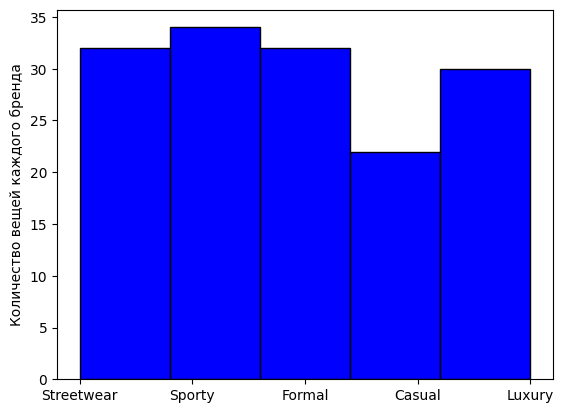

In [55]:
plt.hist(df['Style'], color = 'blue', edgecolor = 'black', bins = int(25/5))
plt.ylabel("Количество вещей каждого бренда")
#Количество вещей в каждом стиле

Text(0, 0.5, 'Оценка вещи')

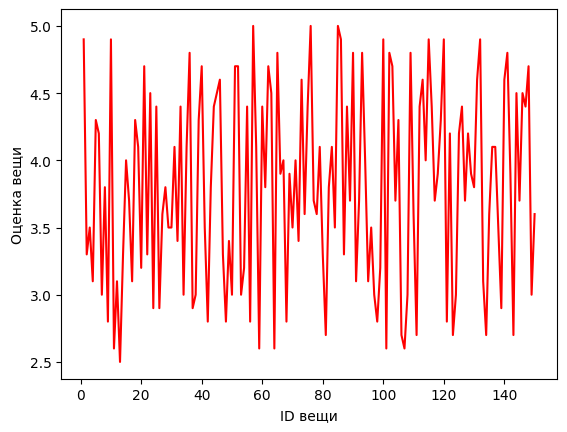

In [56]:
plt.plot(df['ID'], df['Customer_Rating'], color='red')
plt.xlabel("ID вещи")
plt.ylabel("Оценка вещи")
#Зависимость оценки каждого ID

Text(0, 0.5, 'Средняя популярность')

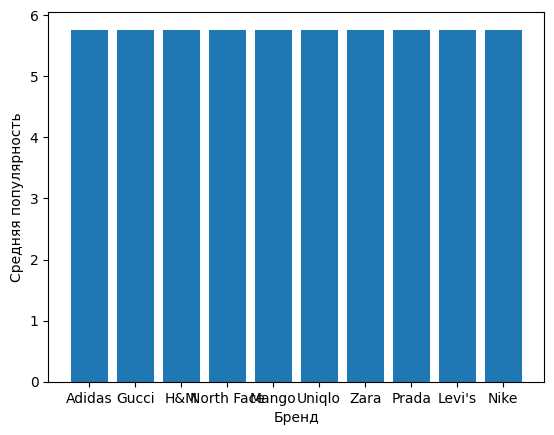

In [57]:
plt.bar(df['Brand'], df['Popularity_Score'].mean())
plt.xlabel("Бренд")
plt.ylabel("Средняя популярность")
#Средняя популярность брендов

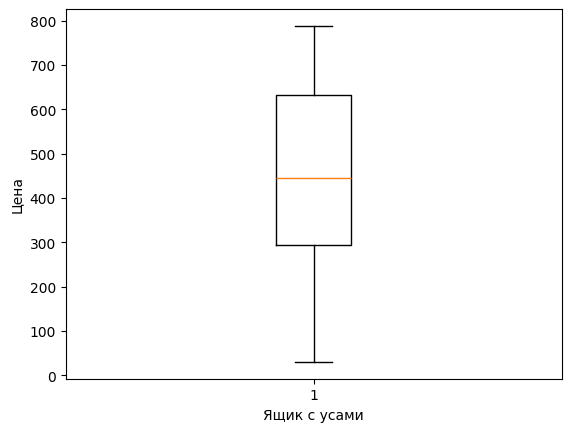

In [58]:
plt.boxplot(df['Price(USD)'])
plt.xlabel("Ящик с усами")
plt.ylabel("Цена")
plt.show()
#Ящик с усами для цен

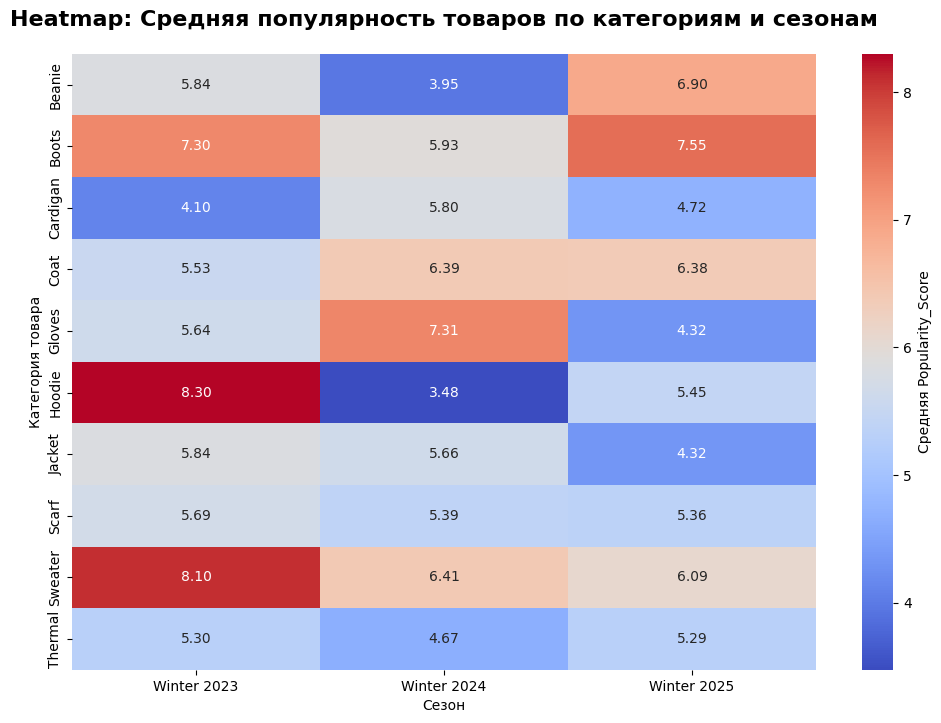

In [59]:
#heatmap корреляция отзывов
heatmap_data = df.pivot_table(
    values='Popularity_Score',
    index='Category',
    columns='Season',
    aggfunc='mean',
    fill_value=0)
plt.figure(figsize=(12, 8))
ax = sns.heatmap(
    heatmap_data,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    linecolor='gray',
    cbar_kws={'label': 'Средняя Popularity_Score'})
plt.title('Heatmap: Средняя популярность товаров по категориям и сезонам', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Сезон')
plt.ylabel('Категория товара')
plt.show()

# D. Группировки и агрегации

In [65]:
agg1 = df.groupby('Brand').agg({'Price(USD)': ['mean', 'median'],     'Customer_Rating': ['mean', 'median'], 'Popularity_Score': ['mean', 'median'] })
print(agg1)
agg2 = df.groupby(['Category', 'Season']).agg({'Price(USD)': ['mean', 'median'],'Popularity_Score': ['mean', 'median']})
print(agg2)
sum1 = df.groupby('Brand').agg({'Popularity_Score': 'sum','Price(USD)': 'sum',     'Customer_Rating': 'sum'}).reset_index()
print("Суммарные показатели по БРЕНДАМ:")
print(sum1.round(2).sort_values('Popularity_Score', ascending=False))

            Price(USD)          Customer_Rating        Popularity_Score       
                  mean   median            mean median             mean median
Brand                                                                         
Adidas      565.399000  555.620        3.960000   3.85         6.270000   5.75
Gucci       458.994286  456.760        3.664286   3.45         5.642857   5.75
H&M         443.940000  407.910        4.066667   4.10         5.253333   5.20
Levi's      459.953750  564.055        3.450000   3.35         5.825000   5.70
Mango       440.217600  468.580        3.744000   3.80         6.528000   7.30
Nike        373.648462  367.560        3.538462   3.50         6.461538   7.30
North Face  368.169000  358.650        3.730000   4.00         5.855000   6.00
Prada       437.876250  424.725        3.956250   4.25         4.693750   4.15
Uniqlo      536.190625  630.855        4.068750   4.05         4.606250   4.10
Zara        402.763846  399.370        3.715385   3.